In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("df_last_encoding.csv")

# suppression de tous les NaN (pas le plus recommandé mais le plus rapide)
df = df.dropna()

In [4]:
# encodage des variables catégorielles
categorical_columns = df.select_dtypes(include=['object']).columns

# Encoder les variables catégorielles
for col in categorical_columns:
    df[col], _ = pd.factorize(df[col])

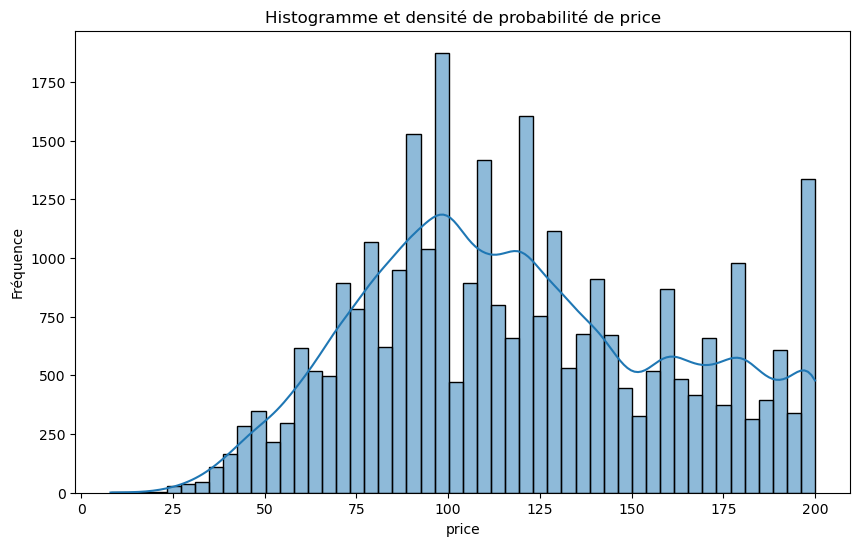

In [5]:
# Supprimer les valeurs supérieures à 50000 dans la colonne 'price'
df = df[df['price'] <= 200]

# supprimer toutes les valeurs égale à 150 dans la colonne 'price'
df = df[df['price'] != 150]

# Afficher la densité de probabilité et l'histogramme pour la colonne 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.xlabel('price')
plt.ylabel('Fréquence')
plt.title('Histogramme et densité de probabilité de price')
plt.show()

In [6]:
# Séparer la target (TotalMin) des features (caractéristiques)
X = df.drop(columns=['price'])  # Toutes les colonnes sauf 'TotalMin' comme features
y = df['price']  # La colonne 'TotalMin' comme cible (target)

# Séparer les données en train (80%) et test (20%) sans mélanger (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Instancier le modèle RandomForestRegressor avec les hyperparamètres
rf_model = RandomForestRegressor(max_depth=12)

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred = rf_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred = rf_model.predict(X_test)

# Calcul du R^2 pour l'ensemble d'entraînement
r2_train = r2_score(y_train, y_train_pred)
print(f"R^2 pour l'ensemble d'entraînement: {r2_train}")

# Calcul du R^2 pour l'ensemble de test
r2_test = r2_score(y_test, y_test_pred)
print(f"R^2 pour l'ensemble de test: {r2_test}")

R^2 pour l'ensemble d'entraînement: 0.5097437661502127
R^2 pour l'ensemble de test: 0.3244419723351155


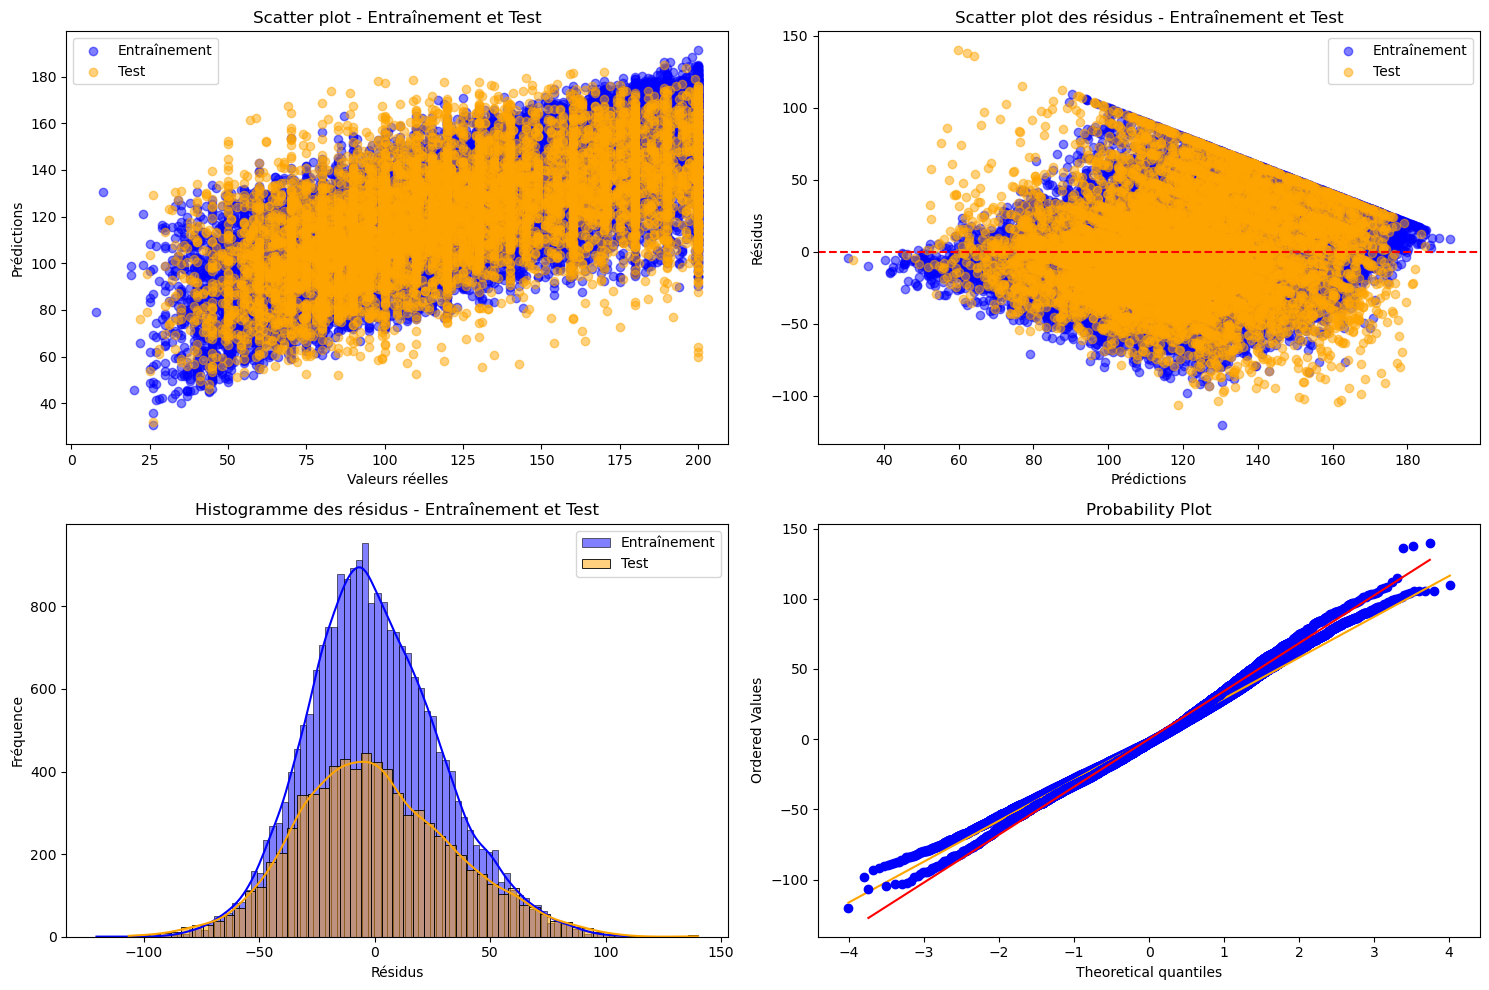

In [7]:
# Calcul des résidus
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Création de la figure et des axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot combiné pour l'ensemble d'entraînement et de test
axs[0, 0].scatter(y_train, y_train_pred, alpha=0.5, label='Entraînement', color='blue')
axs[0, 0].scatter(y_test, y_test_pred, alpha=0.5, label='Test', color='orange')
axs[0, 0].plot([min(y_train + y_test), max(y_train + y_test)], [min(y_train + y_test), max(y_train + y_test)], color='red')  # Ligne y=x
axs[0, 0].set_xlabel('Valeurs réelles')
axs[0, 0].set_ylabel('Prédictions')
axs[0, 0].set_title('Scatter plot - Entraînement et Test')
axs[0, 0].legend()

# Scatter plot des résidus
axs[0, 1].scatter(y_train_pred, residuals_train, alpha=0.5, label='Entraînement', color='blue')
axs[0, 1].scatter(y_test_pred, residuals_test, alpha=0.5, label='Test', color='orange')
axs[0, 1].axhline(y=0, color='red', linestyle='--')
axs[0, 1].set_xlabel('Prédictions')
axs[0, 1].set_ylabel('Résidus')
axs[0, 1].set_title('Scatter plot des résidus - Entraînement et Test')
axs[0, 1].legend()

# Histogramme des résidus
sns.histplot(residuals_train, kde=True, color='blue', label='Entraînement', alpha=0.5, ax=axs[1, 0])
sns.histplot(residuals_test, kde=True, color='orange', label='Test', alpha=0.5, ax=axs[1, 0])
axs[1, 0].set_xlabel('Résidus')
axs[1, 0].set_ylabel('Fréquence')
axs[1, 0].set_title('Histogramme des résidus - Entraînement et Test')
axs[1, 0].legend()

# QQ-plot des résidus
stats.probplot(residuals_train, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ-plot des résidus - Entraînement')
stats.probplot(residuals_test, dist="norm", plot=axs[1, 1])
axs[1, 1].get_lines()[1].set_color('orange')  # Changer la couleur de la ligne de test

plt.tight_layout()
plt.show()

In [29]:
print(y_train.unique())

[(89.0, 115.0], (115.0, 149.0], (149.0, 200.0], (7.999, 89.0]]
Categories (4, interval[float64, right]): [(7.999, 89.0] < (89.0, 115.0] < (115.0, 149.0] < (149.0, 200.0]]


F1 Score: 0.4267
Matrice de Confusion:
[[877 392 114 186]
 [417 585 235 324]
 [180 454 275 550]
 [ 93 246 226 948]]


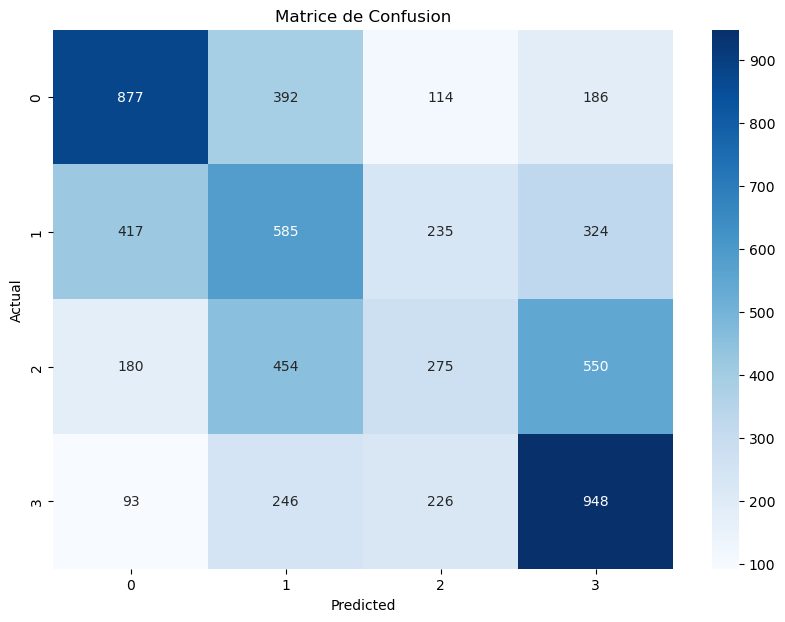

Rapport de Classification:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1569
           1       0.35      0.37      0.36      1561
           2       0.32      0.19      0.24      1459
           3       0.47      0.63      0.54      1513

    accuracy                           0.44      6102
   macro avg       0.43      0.44      0.42      6102
weighted avg       0.43      0.44      0.43      6102



In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_discretized = pd.qcut(df['price'], q=4, labels=False)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y_discretized, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(max_depth=12)
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calculer le F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion:")
print(conf_matrix)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_discretized), yticklabels=np.unique(y_discretized))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion')
plt.show()

# Afficher un rapport de classification
print("Rapport de Classification:")
print(classification_report(y_test, y_pred))